# Actividad 9 - Boosting Classifiers
- Para poder realizar esta actividad debes haber revisado la lectura correspondiente a la semana.
- Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv). Una vez terminada la actividad, comprime la carpeta y sube el .zip a la sección correspondiente.

# Descripción de actividades
- Para esta sesión trabajaremos con una base de datos sobre rotación de clientes en una compañia de telecomunicaciones. El archivo contiene 3333 registros y 20 atributos. El vector objetivo a modelar es la tasa de rotación entre los clientes de una compañia de telecomunicaciones churn . Los atributos existentes hacen referencia a características de la cuenta de cada cliente.
- Lista de atributos:
    - State: Estado de Estados Unidos
    - Account Length: Tiempo en que la cuenta ha sido activada
    - Area Code: código de área.
    - international plan: Plan internacional activiado
    - voice mail plan: Plan de mensajes de voz activado
    - number_vmail_messages: Cantidad de mensajes de voz.
    - total_day_minutes: Cantidad de minutos ocupados en la mañana. 
    - total_day_calls: Cantidad de llamadas realizadas en la mañana. 
    - total_day_charge: Cobros realizados en la mañana.
    - total_eve_minutes: Cantidad de minutos ocupados en la tarde.
    - total_eve_calls: Cantidad de llamadas realizadas en la tarde. 
    - total_eve_charge: Cobros realizados en la tarde.
    - total_night_calls: Cantidad de llamadas realizadas en la noche. 
    - tota_night_minutes: Cantidad de minutos ocupados en la noche. 
    - total_night_charge: Cobros realizados en la noche.
    - total_intl_minutes: Cantidad de minutos ocupados en llamadas internacionales. 
    - total_intl_calls: Cantidad de llamadas internacionales realizadas. 
    - total_intl_charge: Cobros realizados por llamadas internacionales.
    - churn: 1 si el cliente se cambió de compañia, 0 de los contrario. 
    
    *Los datos provienen del paquete AppliedPreditiveModeling de R .*

# Desafío 1: Preprocesamiento
- Grafique el comportamiento distributivo de los atributos y de la variable dependiente. Reporte brevemente el comportamiento de las variables.
- En base al comportamiento de los atributos, considere si es necesario implementar alguna recodificación o transformación de atributo. Algunas normas a seguir:
- Para las variables categóricas, recodifíquelas en variables binarias.
- Para aquellas variables numéricas que presenten alto sesgo, pueden transformarlas con su logaritmo.

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import lec8_graphs as afx
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV



plt.rcParams['figure.figsize'] = (12, 12)

In [19]:
df = pd.read_csv('churn_train.csv').drop(columns="Unnamed: 0")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
state                            3333 non-null object
account_length                   3333 non-null int64
area_code                        3333 non-null object
international_plan               3333 non-null object
voice_mail_plan                  3333 non-null object
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes               3333 non-null float64
total_intl_calls           

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a28fdfeb8>,
      dtype=object)

<Figure size 720x432 with 0 Axes>

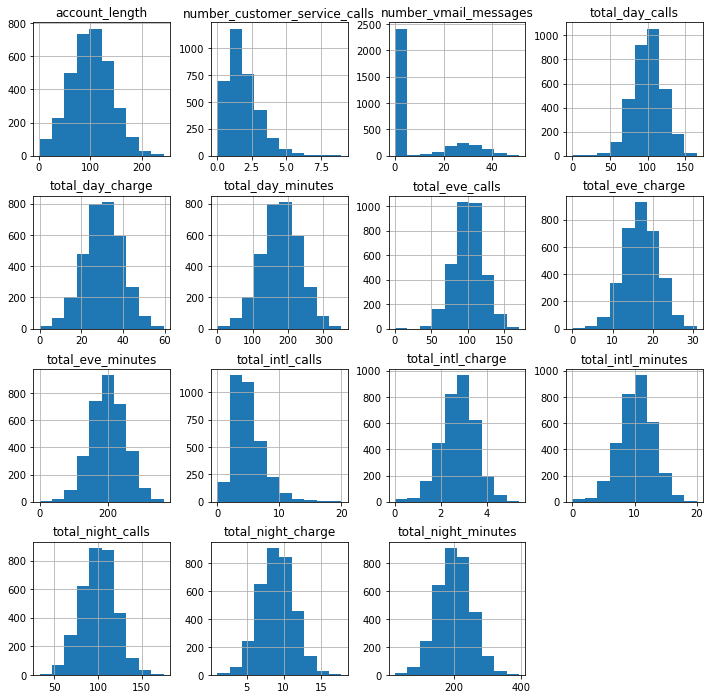

In [23]:
plt.figure(figsize=(10, 6))


df.hist()

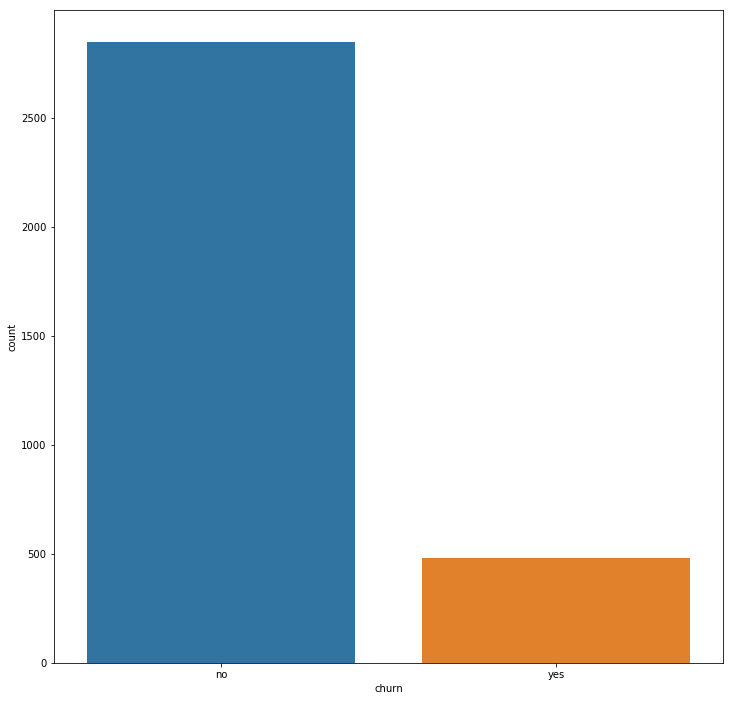

In [25]:
sns.countplot(df['churn'])

In [28]:
objetos = df.select_dtypes('object').columns
df_recoded = pd.get_dummies(data=df, columns=objetos, drop_first=True, prefix=objetos)

In [30]:
df_recoded.head()

account_length  number_vmail_messages  total_day_minutes  total_day_calls  \
0             128                     25              265.1              110   
1             107                     26              161.6              123   
2             137                      0              243.4              114   
3              84                      0              299.4               71   
4              75                      0              166.7              113   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total_night_minutes  total_night_calls  ...  state_VT  state_WA  state_WI  \
0                244.7                 91  ...         0         0         0   
1                254.4                103  ...         0         0         0   
2                162.6                104  ...         0         0         0   
3                196.9                 89  ...         0         0         0   
4                186.9                121  ...         0         0         0   

   state_WV  state_WY  area_code_area_code_415  area_code_area_code_510  \
0         0         0                        1                        0   
1         0         0                        1                        0   
2         0         0                        1                        0   
3         0         0                        0                        0   
4         0         0                        1                        0   

   international_plan_yes  voice_mail_plan_yes  churn_yes  
0                       0                    1          0  
1                       0                    1          0  
2                       0                    0          0  
3                       1                    0          0  
4                       1                    0          0  

[5 rows x 70 columns]

# Desafío 2: Comparación de AdaBoost y Gradient Boosting
- Entrene los clasificadores AdaBoost y Gradient Boosting para mejorar su capacidad predictiva en la medida de lo posible. Para ello, implemente una búsqueda de grilla con las siguientes especificaciones:

Modelo
     AdaBoostClassifier

 {'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 500, 1000, 2000]}
     
 GradientBoostingClassifier   
   
   {'learning_rate': [0.01, 0.1,0.5],'n_estimators': [50, 100, 500, 1000,
    2000], 'subsample': [0.1,0.5,0.9]}

- Si el tiempo de computación es alto, puede implementar la búsqueda con 1 validación cruzada.
- Reporte las métricas para los mejores modelos.

In [38]:
X_train_mat, X_test_mat, y_train_vec, y_test_vec = train_test_split(df_recoded.drop(columns='churn_yes'),
                                                                    df_recoded['churn_yes'],
                                                                    test_size=.33,
                                                                    random_state=3504)

## AdaBoostClassifier

In [39]:
search_params = {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50, 100, 500, 1000, 2000]}
cv_ada_model = GridSearchCV(
    AdaBoostClassifier(random_state=3504),
    param_grid = search_params,
    n_jobs=-1).fit(X_train_mat,y_train_vec)


In [40]:
cv_ada_model.best_params_

{'learning_rate': 0.1, 'n_estimators': 2000}

In [46]:
best_model_ada = cv_ada_model.best_estimator_.fit(X_train_mat,y_train_vec)

In [47]:
y_hat = best_model_ada.predict(X_test_mat)
print(classification_report(y_test_vec, y_hat))

             precision    recall  f1-score   support

          0       0.90      0.94      0.92       940
          1       0.52      0.36      0.42       160

avg / total       0.84      0.86      0.85      1100



## GradientBoostingClassifier   



In [51]:
search_params =   {'learning_rate': [0.01, 0.1,0.5],'n_estimators': [50, 100, 500, 1000,
    2000], 'subsample': [0.1,0.5,0.9]}

cv_gradient = GridSearchCV(
    GradientBoostingClassifier(random_state=3504),
    param_grid = search_params,
    n_jobs=-1).fit(X_train_mat,y_train_vec)



In [52]:
best_model_grad = cv_gradient.best_estimator_.fit(X_train_mat,y_train_vec)

In [53]:
y_hat = best_model_grad.predict(X_test_mat)
print(classification_report(y_test_vec, y_hat))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97       940
          1       0.85      0.73      0.79       160

avg / total       0.94      0.94      0.94      1100



El mejor modelo es aquel con GradientBoostingClassifier, dado que tiene mejores métricas en ambos casos (0,1). El desbalance de clases afecta más al AdaBoost Classifier

# Desafío 4: Principales factores asociados
- Con el mejor modelo, reporte la importancia relativa de los atributos y comente cuáles son los que aumentan la probabilidad de fuga en los clientes.

*tip: Pueden implementar la función plot_importance que se encuentra en la lectura de Bagging y Random Forest*

In [59]:
best_model_grad.feature_importances_

array([3.53247636e-02, 2.58397871e-02, 1.04380940e-01, 3.58392429e-02,
       1.07276061e-01, 9.13578856e-02, 4.02090793e-03, 5.45144346e-02,
       4.32288659e-02, 5.62532013e-02, 3.89898888e-02, 4.43016026e-02,
       9.59058823e-02, 5.22710541e-02, 6.41279895e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.83567907e-04, 5.40378403e-03, 4.70563064e-04, 0.00000000e+00,
       0.00000000e+00, 9.35602839e-04, 1.63605149e-03, 0.00000000e+00,
       1.86581898e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.88755066e-03, 1.91065396e-03, 3.83540994e-03, 6.48899014e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.21744740e-03,
       0.00000000e+00, 3.63804885e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.00920863e-03, 4.50763427e-03, 0.00000000e+00,
       4.53614761e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.74661436e-03, 9.75618298e-03, 0.00000000e+00,
      

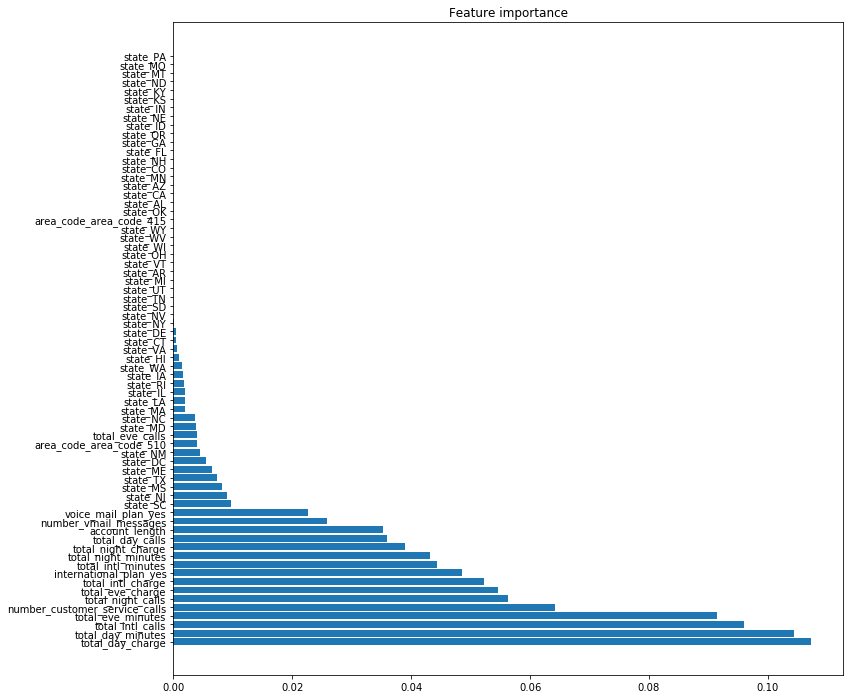

In [58]:
afx.plot_importance(best_model_grad, df_recoded.drop(columns='churn_yes').columns)

los atributos que mas influen son total_day_charge, total_day_minutes, total_intl_calls. Es decir la cantidad de tiempo y dinero gastado durante el día y la cantidad de llamadas internacionales

# Desafío 5: Probabilidad de fuga
- El gerente general necesita saber en qué estados hay una mayor probabilidad de fuga de clientes. Para ello, identifique los tres estados con una mayor probabilidad de fuga. Implemente el modelo predictivo con el archivo churn_test.csv .
- Recuerde que para obtener la probabilidad de clase, debe utilizar la función predict_proba del modelo.

In [66]:
df_test = pd.read_csv('churn_test.csv').drop(columns='Unnamed: 0')
objetos = df_test.select_dtypes('object').columns
df_test_recoded = pd.get_dummies(data=df_test, columns=objetos, drop_first=True, prefix=objetos)


In [68]:
y_test_2 = df_test_recoded.drop(columns='churn_yes')

In [69]:
best_model_grad.predict_proba(y_test_2)

array([[0.97885972, 0.02114028],
       [0.92203421, 0.07796579],
       [0.87750115, 0.12249885],
       ...,
       [0.97760277, 0.02239723],
       [0.98432301, 0.01567699],
       [0.98905295, 0.01094705]])

In [71]:
predicciones = [i[1] for i in best_model_grad.predict_proba(y_test_2)]

In [86]:
df_test.head()

state  account_length      area_code international_plan voice_mail_plan  \
0    HI             101  area_code_510                 no              no   
1    MT             137  area_code_510                 no              no   
2    OH             103  area_code_408                 no             yes   
3    NM              99  area_code_415                 no              no   
4    SC             108  area_code_415                 no              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                      0               70.9              123   
1                      0              223.6               86   
2                     29              294.7               95   
3                      0              216.8              123   
4                      0              197.4               78   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             12.05              211.9               73             18.01   
1             38.01              244.8              139             20.81   
2             50.10              237.3              105             20.17   
3             36.86              126.4               88             10.74   
4             33.56              124.0              101             10.54   

   total_night_minutes  total_night_calls  total_night_charge  \
0                236.0                 73               10.62   
1                 94.2                 81                4.24   
2                300.3                127               13.51   
3                220.6                 82                9.93   
4                204.5                107                9.20   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.6                 3               2.86   
1                 9.5                 7               2.57   
2                13.7                 6               3.70   
3                15.7                 2               4.24   
4                 7.7                 4               2.08   

   number_customer_service_calls     churn  
0                              3  0.021140  
1                              0  0.077966  
2                              1  0.122499  
3                              1  0.025595  
4                              2  0.018781

In [78]:
df_test['churn'] = predicciones

In [80]:
df_final = df_test[['state','churn']]

In [88]:
(df_final.groupby(by='state').mean()).reset_index().sort_values('churn', ascending=False).head(3)

state     churn
31    NJ  0.306222
36    OK  0.236435
43    TX  0.188281

Los estados con mayor probabilidad de churn son NJ, OK y TX